In [20]:
import numpy as np
import matplotlib.pyplot as plt

def plot_map(themap: np.array):
    othermap = np.zeros_like(themap, dtype=int)
    for pos in np.argwhere(themap=="@"):
        othermap[tuple(pos)] = -1
    for pos in np.argwhere(themap=="O"):
        othermap[tuple(pos)] = 1
    for pos in np.argwhere(themap=="#"):
        othermap[tuple(pos)] = 2

    plt.rcParams['figure.figsize'] = (4,4)
    plt.matshow(othermap)
    plt.yticks([x-.5 for x in range(1,themap.shape[0])], '')
    plt.xticks([x-.51 for x in range(1,themap.shape[1])], '')
    plt.grid(axis="both", which="major")

'^^<>v^v^v>><<^<^<>>v>vv^<>^><v<><v^<vv<v^^<v^>^>><^>>>^<^v>^>v<^<<^>^<^v<^<v<<>^vvv^<^^v^v>^<><v>vvv<<<^><<^v^^^vv^v<vv>v<><><<v^v^>^v<<v^<><v>^>><vvv>v^vv<>>>><v^<>v>vv>v^>><>vv^^<v<<<<vv<><<^^<><<<^v><<^v^vvv^v<v>v^^vv^vv><<<<v>>v<^^<^vv<^^>v^^>^><^^v<^<v>^>v<^^^>>><<>><v^>^^>vv<>^^v>v><vvvv<<>v<^<v><v^<>^<><<^>^^vv><vv><<<<v>^<v><<<v<v><>>v^^<v<>vv>^v>v><>^vv^^<><>^vvv^vv^>^^v^^>>v<>>>^>><><>v>v<<^v^vv^<^vv>v<v<v^<^^v<^<vv>>v^v<vv^vv>^>><v>^>^<v^v>^<v^>>v^v^><v<v^><v><><^<>v^<^^^v<>>^v^^v^<>v><^<^v^^vv<><vv>^v^<>vvv<><>><^<^^<^^v>vv>>><vv^v><<<<v<vv^<<>^^v^v^><v>vv^>v^v<vv><><>^>^>>><>^^v^^<>v^v>>v^<>v<^>^^v>^<vv^>>v>v^vv<^>v>v>>^<><^^<^v<v<vv^<>^<^>^>>vv^<v><^v^>^^<v<<^>>^><>>^^<^^><<<<<^<^>>>^><>>v^^vv<>>^>><<<<>^>v^vv<v^<v<^><v>v^vv<^>^<<<<>>v<>^><<v><vv>^v^vv^v<><^>^v>v<^>vv^v><<^>>v^>v<^><<>>>v<<<<^<<vvv^^>><>^<>v>^vv>^<>^^^vv<><^>v<<^><v<<^^<<<^v<<^<><<^v<^v>^v>^>^v<><v^<<>v<^>><<^<<vvv<vv<<><<<<<^<>^^^<<>>v><vv^>v^v<^^v^^<v^<<>^v<vvv<>v^^<>v>v<><>vv<><^>><<><<><^>^v<^>v^<>>v

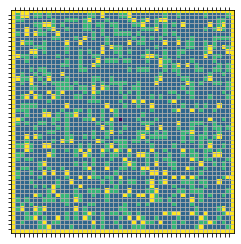

In [21]:
filename = "input15.txt"
with open(filename, "r") as file:
    maxrows=0
    while file.readline() != "\n":
        maxrows+=1
    commands = file.readlines()
commands = "".join(commands).replace("\n", "")

themap = np.genfromtxt(filename, dtype='str', delimiter=1, comments=None, max_rows=maxrows)
plot_map(themap)
commands

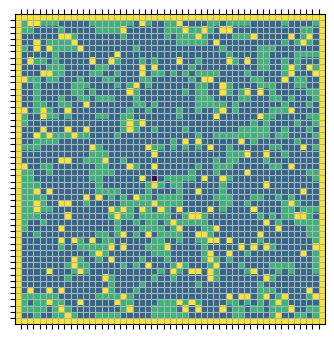

In [273]:
for char in commands:
    ri, rj = np.argwhere(themap=="@")[0]
    
    if char == ">":
        ahead = themap[ri,rj:]
        if "." not in ahead: continue
        dotloc = np.argwhere(ahead==".")[0][0]
        if dotloc > np.argwhere(ahead=="#")[0]: continue
        themap[ri,rj+1:rj+1+dotloc] = themap[ri,rj:rj+dotloc]
    
    elif char =="v":
        ahead = themap[ri:,rj]
        if "." not in ahead: continue
        dotloc = np.argwhere(ahead==".")[0][0]
        if dotloc > np.argwhere(ahead=="#")[0]: continue
        themap[ri+1:ri+1+dotloc,rj] = themap[ri:ri+dotloc,rj]

    elif char =="<":
        ri, rj = np.argwhere(themap=="@")[0]
        ahead = themap[ri,:rj+1]
        if "." not in ahead: continue
        dotloc = np.argwhere(ahead==".")[-1][0]
        if dotloc < np.argwhere(ahead=="#")[-1]: continue
        themap[ri, dotloc:rj] = themap[ri, dotloc+1:rj+1]

    elif char == "^":
        ri, rj = np.argwhere(themap=="@")[0]
        ahead = themap[:ri+1,rj]
        if "." not in ahead: continue
        dotloc = np.argwhere(ahead==".")[-1][0]
        if dotloc < np.argwhere(ahead=="#")[-1]: continue
        themap[dotloc:ri, rj] = themap[dotloc+1:ri+1, rj]

    themap[ri,rj] = "."
plot_map(themap)

In [274]:
boxes = np.argwhere(themap=="O")
sum(100*box[0] + box[1] for box in boxes)

1448589

Part II

In [11]:
import numpy as np
np.set_printoptions(linewidth=10000)

In [12]:
def plot_map(themap: np.array):
    othermap = np.zeros_like(themap, dtype=int)
    for pos in np.argwhere(themap=="@"):    othermap[tuple(pos)] = -1
    for pos in np.argwhere(themap == "O"):  othermap[tuple(pos)] = 1
    for pos in np.argwhere(themap == "["):  othermap[tuple(pos)] = 2
    for pos in np.argwhere(themap == "]"):  othermap[tuple(pos)] = 2
    for pos in np.argwhere(themap=="#"):    othermap[tuple(pos)] = 3

    plt.rcParams['figure.figsize'] = (2,4)
    plt.matshow(othermap)
    plt.yticks([x-.5 for x in range(1,othermap.shape[0])], ['']*(othermap.shape[0]-1))
    plt.xticks([x-.51 for x in range(1,othermap.shape[1])], ['']*(othermap.shape[1]-1))
    plt.grid(axis="both", which="major")

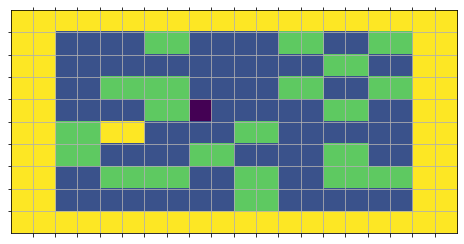

In [16]:
filename = "input15example.txt"
with open(filename, "r") as file:
    maxrows=0
    while file.readline() != "\n":
        maxrows+=1
    commands = file.readlines()
commands = "".join(commands).replace("\n", "")

themap = np.genfromtxt(filename, dtype='str', delimiter=1, comments=None, max_rows=maxrows)
bigmap = np.zeros((themap.shape[0], themap.shape[1]*2), dtype=str)
for i in range(themap.shape[1]):
    bigmap[:, 2*i] = themap[:, i]
    bigmap[:, 2*i+1] = themap[:, i]
bigmap[tuple(np.argwhere(bigmap=="@")[1])] = "."
for pos in np.argwhere(bigmap=="O")[::2]:
    bigmap[tuple(pos)]="["
    bigmap[tuple(pos+[0,1])]="]"
plot_map(bigmap)
# commands

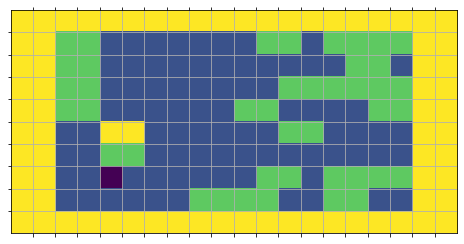

In [17]:
for char in commands:
    ri, rj = np.argwhere(bigmap=="@")[0]
    
    #horizontal: no change
    if   char == ">":
        ahead = bigmap[ri,rj:]
        if "." not in ahead: continue
        dotloc = np.argwhere(ahead==".")[0][0]
        if dotloc > np.argwhere(ahead=="#")[0]: continue
        bigmap[ri,rj+1:rj+1+dotloc] = bigmap[ri,rj:rj+dotloc]
        bigmap[ri,rj] = "."
        
    elif char == "<":
        ri, rj = np.argwhere(bigmap=="@")[0]
        ahead = bigmap[ri,:rj+1]
        if "." not in ahead: continue
        dotloc = np.argwhere(ahead==".")[-1][0]
        if dotloc < np.argwhere(ahead=="#")[-1]: continue
        bigmap[ri, dotloc:rj] = bigmap[ri, dotloc+1:rj+1]
        bigmap[ri,rj] = "."
         
    #vertical: many changes needed
    elif char == "v":
        if bigmap[ri+1,rj]=="#": continue
        if bigmap[ri+1,rj]==".":
            bigmap[ri+1,rj]="@"
            bigmap[ri,rj] = "."
            continue
        
        if   bigmap[ri+1,rj] == "[":    moved_boxes_l = {(ri+1,rj  )};  to_check = {(ri+1,rj), (ri+1,rj+1)}
        elif bigmap[ri+1,rj] == "]":    moved_boxes_l = {(ri+1,rj-1)};  to_check = {(ri+1,rj-1), (ri+1,rj)}
        #moved_boxes_l: left half of boxes to move
        #to_check:      boxes below those to move, to check for collisions
        while to_check:
            box_0, box_1 = to_check.pop()
            if bigmap[box_0, box_1] == "#": break
            if bigmap[box_0, box_1] == "[":
                moved_boxes_l.update({(box_0,  box_1)}) 
                to_check.     update({(box_0+1,box_1), (box_0+1,box_1+1)})
            elif bigmap[box_0, box_1] == "]":
                moved_boxes_l.update({(box_0,  box_1-1)})
                to_check.     update({(box_0+1,box_1-1), (box_0+1,box_1)})
        else: #make the move
            for (pos0, pos1) in moved_boxes_l: bigmap[pos0,  pos1] = "."; bigmap[pos0  ,pos1+1] = "." 
            for (pos0, pos1) in moved_boxes_l: bigmap[pos0+1,pos1] = "["; bigmap[pos0+1,pos1+1] = "]"
            bigmap[ri+1,rj]="@"
            bigmap[ri,rj] = "."

    elif char == "^":
        if bigmap[ri-1,rj]=="#": continue
        if bigmap[ri-1,rj]==".":
            bigmap[ri-1,rj]="@"
            bigmap[ri,rj] = "."
            continue
        
        if   bigmap[ri-1,rj] == "[":    moved_boxes_l = {(ri-1,rj  )};  to_check = {(ri-1,rj), (ri-1,rj+1)}
        elif bigmap[ri-1,rj] == "]":    moved_boxes_l = {(ri-1,rj-1)};  to_check = {(ri-1,rj-1), (ri-1,rj)}
        
        while to_check:
            box_0, box_1 = to_check.pop()
            if bigmap[box_0, box_1] == "#": break
            if bigmap[box_0, box_1] == "[":
                moved_boxes_l.update({(box_0,  box_1)})
                to_check.     update({(box_0-1,box_1)  ,(box_0-1,box_1+1)})
            elif bigmap[box_0, box_1] == "]":
                moved_boxes_l.update({(box_0,  box_1-1)})
                to_check.     update({(box_0-1,box_1-1) ,(box_0-1,box_1  )})
        else: #make the move
            for (pos0, pos1) in moved_boxes_l: bigmap[pos0  ,pos1] = "."; bigmap[pos0  ,pos1+1] = "."
            for (pos0, pos1) in moved_boxes_l: bigmap[pos0-1,pos1] = "["; bigmap[pos0-1,pos1+1] = "]"
            bigmap[ri-1,rj]="@"
            bigmap[ri,rj] = "."

plot_map(bigmap)

In [18]:
boxesleft = np.argwhere(bigmap=="[")
sum(100*box[0] + box[1] for box in boxesleft)

9021

Extra cells

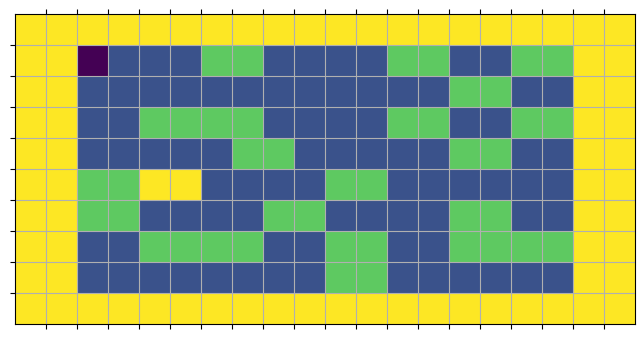

In [ ]:
#placing the @ by hand
bigmap[tuple(np.argwhere(bigmap=="@")[0])] = "."
bigmap[(1,2)] = "@"
plot_map(bigmap)

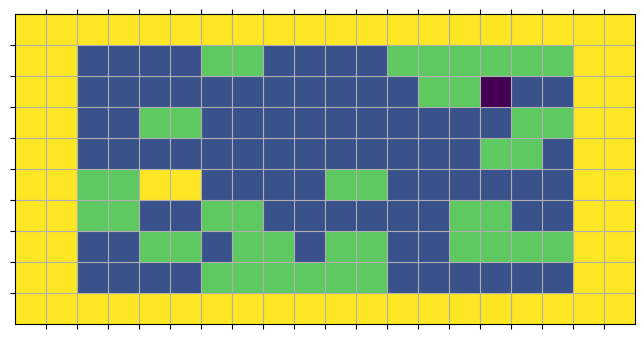

In [ ]:
#move ^
ri, rj = np.argwhere(bigmap=="@")[0]
for _ in range(1):
    if bigmap[ri-1,rj]=="#": continue
    if bigmap[ri-1,rj]==".":
        bigmap[ri-1,rj]="@"
        bigmap[ri,rj] = "."
        continue
    if bigmap[ri-1,rj] == "[":   moved_boxes = {(ri-1,rj):"[",(ri-1,rj+1):"]"}
    elif bigmap[ri-1,rj] == "]": moved_boxes = {(ri-1,rj):"]",(ri-1,rj-1):"["}
    to_check = {(box[0]-1,box[1]) for box in moved_boxes}
    while to_check:
        box_0, box_1 = to_check.pop()
        if bigmap[box_0, box_1] == "#": break
        if bigmap[box_0, box_1] == "[":
            moved_boxes.update({(box_0,  box_1):"[",   (box_0  ,box_1+1):"]"})
            to_check.   update({(box_0-1,box_1)    ,   (box_0-1,box_1+1)    })
        elif bigmap[box_0, box_1] == "]":
            moved_boxes.update({(box_0,  box_1-1):"[", (box_0  ,box_1  ):"]"})
            to_check.   update({(box_0-1,box_1-1)    , (box_0-1,box_1  )    })

    else: #make the move
        for pos in moved_boxes: bigmap[pos] = "."
        for (pos0, pos1) in moved_boxes:
            bigmap[pos0-1,pos1] = moved_boxes[(pos0, pos1)]
        bigmap[ri-1,rj]="@"
        bigmap[ri,rj] = "."

plot_map(bigmap)

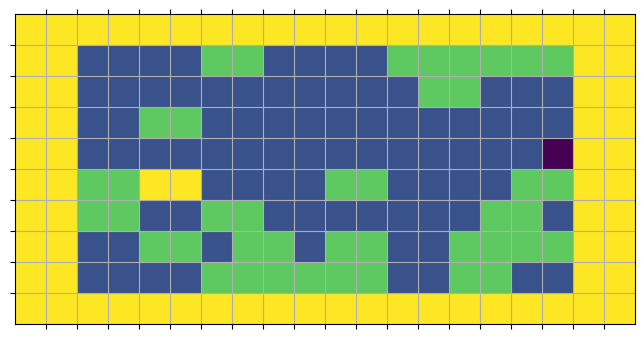

In [ ]:
#move v
ri, rj = np.argwhere(bigmap=="@")[0]
for _ in range(1):
    if bigmap[ri+1,rj]=="#": continue
    if bigmap[ri+1,rj]==".":
        bigmap[ri+1,rj]="@"
        bigmap[ri,rj] = "."
        continue
    if bigmap[ri+1,rj] == "[":   moved_boxes = {(ri+1,rj):"[",(ri+1,rj+1):"]"}
    elif bigmap[ri+1,rj] == "]": moved_boxes = {(ri+1,rj):"]",(ri+1,rj-1):"["}
    to_check = {(box[0]+1,box[1]) for box in moved_boxes}
    while to_check:
        box_0, box_1 = to_check.pop()
        if bigmap[box_0, box_1] == "#": break
        if bigmap[box_0, box_1] == "[":
            moved_boxes.update({(box_0,  box_1):"[",   (box_0  ,box_1+1):"]"})
            to_check.   update({(box_0+1,box_1)    ,   (box_0+1,box_1+1)    })
        elif bigmap[box_0, box_1] == "]":
            moved_boxes.update({(box_0,  box_1-1):"[", (box_0  ,box_1  ):"]"})
            to_check.   update({(box_0+1,box_1-1)    , (box_0+1,box_1  )    })

    else: #make the move
        for pos in moved_boxes: bigmap[pos] = "."
        for (pos0, pos1) in moved_boxes:
            bigmap[pos0+1,pos1] = moved_boxes[(pos0, pos1)]
        bigmap[ri+1,rj]="@"
        bigmap[ri,rj] = "."

plot_map(bigmap)

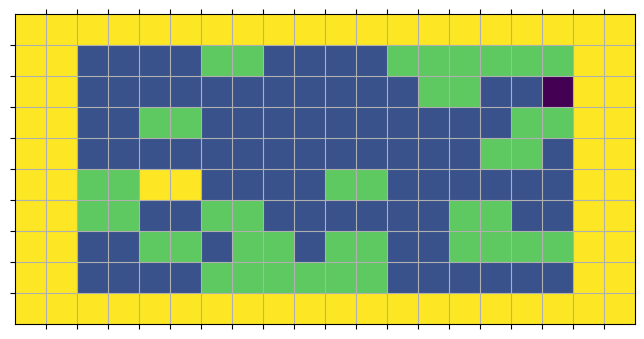

In [ ]:
#move >
ri, rj = np.argwhere(bigmap=="@")[0]
for _ in range(1):
    ahead = bigmap[ri,rj:]
    if "." not in ahead: continue
    dotloc = np.argwhere(ahead==".")[0][0]
    if dotloc > np.argwhere(ahead=="#")[0]: continue
    bigmap[ri,rj+1:rj+1+dotloc] = bigmap[ri,rj:rj+dotloc]
    bigmap[ri,rj] = "." 
plot_map(bigmap)

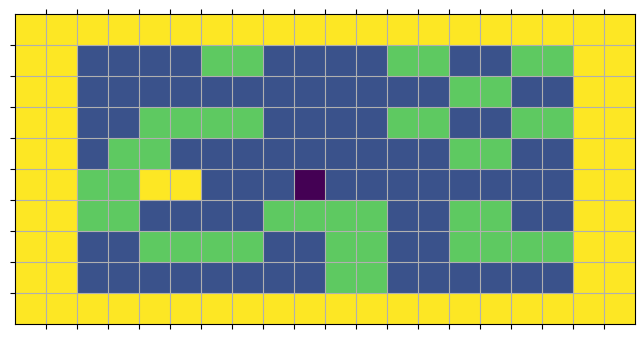

In [ ]:
#move <
ri, rj = np.argwhere(bigmap=="@")[0]
for _ in range(1):
    ri, rj = np.argwhere(bigmap=="@")[0]
    ahead = bigmap[ri,:rj+1]
    if "." not in ahead: continue
    dotloc = np.argwhere(ahead==".")[-1][0]
    if dotloc < np.argwhere(ahead=="#")[-1]: continue
    bigmap[ri, dotloc:rj] = bigmap[ri, dotloc+1:rj+1]
    bigmap[ri,rj] = "."
plot_map(bigmap)